In [ ]:
import pandas as pd 
df = pd.read_csv("demographic_data.csv")

df

,County,State,State FIPS Code,County FIPS Code,FIPS,Total Population,Male Population,Female Population,Total Race Responses,White Alone,Black or African American Alone,Hispanic or Latino
0,Autauga County,Alabama,1,1,1001,59285,28669,30616,59285,43616,11829,2188
1,Baldwin County,Alabama,1,3,1003,239945,117316,122629,239945,198721,19144,13393
2,Barbour County,Alabama,1,5,1005,24757,12906,11851,24757,10891,11616,1490
3,Bibb County,Alabama,1,7,1007,22152,11824,10328,22152,16634,4587,744
4,Blount County,Alabama,1,9,1009,59292,29934,29358,59292,53062,747,5962
...,...,...,...,...,...,...,...,...,...,...,...,...
3217,Vega Baja Municipio,Puerto Rico,72,145,72145,54058,25765,28293,54058,13681,2249,53036
3218,Vieques Municipio,Puerto Rico,72,147,72147,8147,4178,3969,8147,1028,222,7803
3219,Villalba Municipio,Puerto Rico,72,149,72149,21778,10510,11268,21778,7552,2219,21700
3220,Yabucoa Municipio,Puerto Rico,72,151,72151,29868,14381,15487,29868,2001,5900,29732


Contea più popolosa:
County              Los Angeles County
State                       California
Total Population               9848406
Name: 205, dtype: object

Contea meno popolosa:
County              Kalawao County
State                       Hawaii
Total Population                43
Name: 550, dtype: object


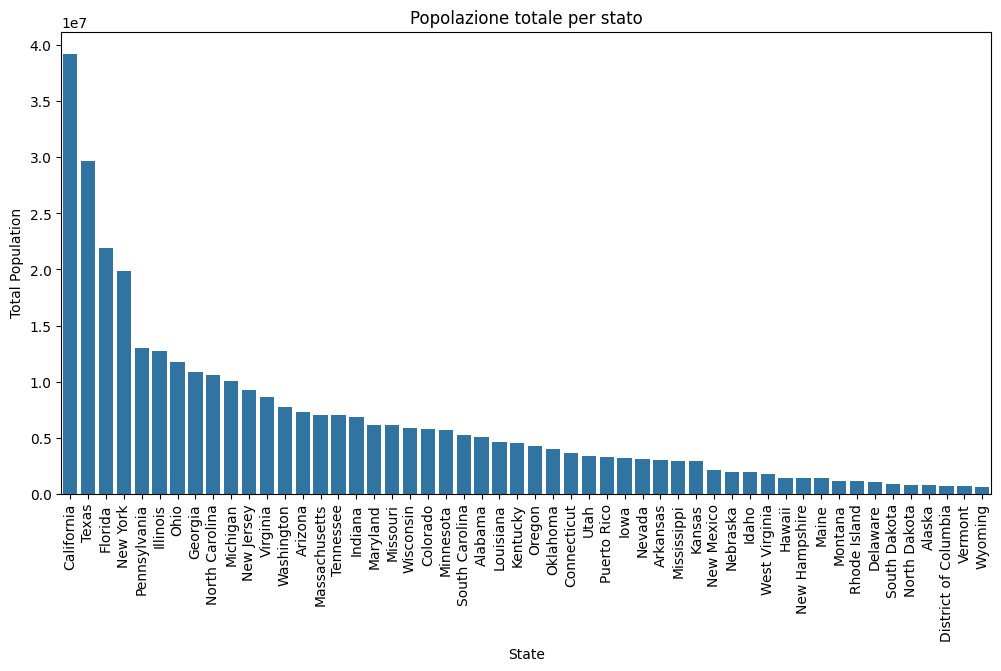

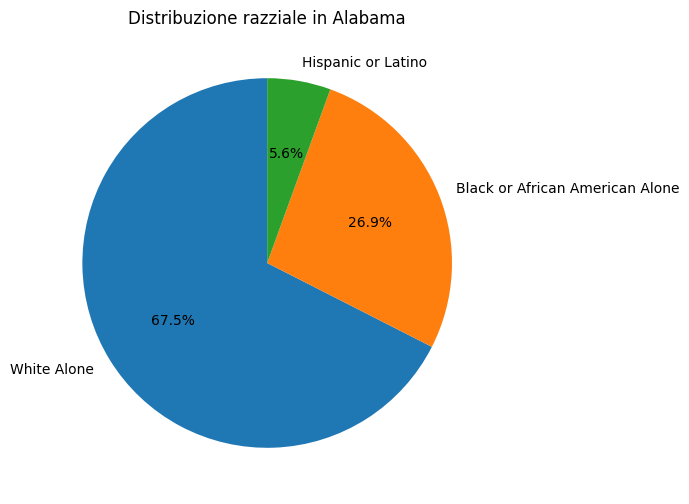

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Caricamento dati
df = pd.read_csv("demographic_data.csv")

# 1. Popolazione totale per stato
df_state = df.groupby("State")["Total Population"].sum().reset_index()

# 2. Distribuzione di genere
df["Male Percentage"] = (df["Male Population"] / df["Total Population"]) * 100
df["Female Percentage"] = (df["Female Population"] / df["Total Population"]) * 100

# 3. Distribuzione razziale per stato
df_ethnicity = df.groupby("State")[["White Alone", "Black or African American Alone", "Hispanic or Latino"]].sum()
df_ethnicity = df_ethnicity.div(df_ethnicity.sum(axis=1), axis=0) * 100  # Percentuale per stato

# 4. Outlier: contee con popolazione massima e minima
max_county = df.loc[df["Total Population"].idxmax(), ["County", "State", "Total Population"]]
min_county = df.loc[df["Total Population"].idxmin(), ["County", "State", "Total Population"]]

print("Contea più popolosa:")
print(max_county)
print("\nContea meno popolosa:")
print(min_county)

# 5. Visualizzazioni
plt.figure(figsize=(12,6))
sns.barplot(x="State", y="Total Population", data=df_state.sort_values("Total Population", ascending=False))
plt.xticks(rotation=90)
plt.title("Popolazione totale per stato")
plt.show()

# Grafico a torta per la distribuzione razziale di un determinato stato (esempio: Alabama)
alabama_data = df_ethnicity.loc["Alabama"]
alabama_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Distribuzione razziale in Alabama")
plt.ylabel("")
plt.show()




